In [43]:
# Imports
import glob
import csv
from gensim.models.phrases import Phrases, Phraser
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import timeit
import utils
import pprint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
# Split Data in Training and Testing set
srch_str = 'dialogs/4/*.tsv'
all_files = sorted(glob.glob(srch_str))
X_train, X_test= train_test_split(all_files, test_size=0.1, random_state=0)

In [20]:
# Peek into Training Set
X_train[:10]

['dialogs/4/92237.tsv',
 'dialogs/4/133611.tsv',
 'dialogs/4/251383.tsv',
 'dialogs/4/61098.tsv',
 'dialogs/4/97786.tsv',
 'dialogs/4/209410.tsv',
 'dialogs/4/178701.tsv',
 'dialogs/4/5544.tsv',
 'dialogs/4/11152.tsv',
 'dialogs/4/208348.tsv']

In [21]:
# Peek into Testing Set
X_test[:10]

['dialogs/4/78303.tsv',
 'dialogs/4/197806.tsv',
 'dialogs/4/119980.tsv',
 'dialogs/4/25704.tsv',
 'dialogs/4/963.tsv',
 'dialogs/4/214077.tsv',
 'dialogs/4/80273.tsv',
 'dialogs/4/208635.tsv',
 'dialogs/4/34820.tsv',
 'dialogs/4/126671.tsv']

In [100]:
help(utils.lemmatize_pos)

Help on function lemmatize_pos in module utils:

lemmatize_pos(text)
    Helper function to Remove POS tags with gensim Lemmatize
    Input: {text}
    -- text = String of words
    Output: {result}
    -- result = List with POS tags starting with 'J' and 'V' removed
    Note:
        Please run from within create_data()



In [135]:
# Compare effect of "more involved" lemmatization True vs False
num = 5
start_time = timeit.default_timer()
corpus_ = utils.create_data(X_train[:num], lemmat=True)            
elapsed_true = timeit.default_timer() - start_time
pp = pprint.PrettyPrinter(indent=1, width = 12)
utils.prettyPrint(corpus_) 

0 :   ['just', 'bit', 'skype', 'let', 'bit', 'also', 'help', 'codec', 'music', 'film', 'tutorial', 'ubuntu', 'forum', 'here', 'ubuntuforum', 'showthread', 'highlight', 'skype', 'way', 'tutorial'] 

1 :   ['pavillion', 'driver', 'mouse', 'tom', 'storm', 'thank', 'tom'] 

2 :   ['change', 'screen', 'resolution', 'message', 'server', 'not', 'extension', 'way', 'working', 'well', 'log', 'out', 'gdm', 'configure', 'root', 'then', 'root', 'config', 'etc', 'config', 'xorg', 'conf', 'just', 'ati', 'driver', 'matter', 'still', 'configureit', 'nvidia', 'driver', 'atus'] 

3 :   ['type', 'asoundconf', 'gtk', 'default', 'configuration', 'file', 'asoundrc', 'asoundconf', 'asoundrc', 'text', 'editor', 'there', 'line', 'asound', 'tellign', 'file', 'asoundconf', 'not', 'anywhere', 'type', 'sorry', 'not', 'ubuntu', 'dot', 'maybe', 'somebody', 'here', 'look', 'oyu'] 

4 :   ['anyone', 'network', 'mount', 'dev', 'xxx', 'mnt', 'yyywhat', 'problemugh', 'irc', 'client'] 



In [136]:
# Compare Lemmat true vs False
start_time = timeit.default_timer()
corpus_ = utils.create_data(X_train[:num], lemmat=False)            
elapsed_false = timeit.default_timer() - start_time
pp = pprint.PrettyPrinter(indent=4)
utils.prettyPrint(corpus_)

0 :   [u'hello', u'all', u'just', u'installed', u'bit', u'and', u'need', u'help', u'installing', u'skype', u'won', u'let', u'because', u'bit', u'also', u'need', u'some', u'help', u'installing', u'codecs', u'for', u'music', u'and', u'films', u'there', u'was', u'tutorial', u'the', u'ubuntu', u'forums', u'here', u'http', u'ubuntuforums', u'org', u'showthread', u'php', u'highlight', u'skype', u'amd', u'you', u'have', u'link', u'way', u'locate', u'the', u'tutorial'] 

1 :   [u'installing', u'linux', u'laptop', u'its', u'pavillion', u'will', u'need', u'special', u'drivers', u'for', u'the', u'mouse', u'and', u'such', u'nice', u'tom', u'storm', u'thanks', u'was', u'that', u'nice', u'tom', u'for'] 

2 :   [u'when', u'try', u'change', u'screen', u'resolution', u'get', u'message', u'saying', u'the', u'server', u'does', u'not', u'support', u'the', u'xrandr', u'extension', u'think', u'better', u'way', u'get', u'working', u'well', u'this', u'log', u'out', u'shut', u'down', u'gdm', u'configure', u'ro

In [137]:
# Comparison 
print('Elapsed time for {} files with Lemmatize is {} sec and {} sec without Lemmatize. This is a {} times slowdown at the cost of better outputs'.format(num, elapsed_true, elapsed_false, elapsed_true/float(elapsed_false)))

Elapsed time for 5 files with Lemmatize is 0.0543961524963 sec and 0.0023021697998 sec without Lemmatize. This is a 23.6282104391 times slowdown at the cost of better outputs


## If we only could look ahead in future to see, if this is worth it ?
### With lemmatize
![alt text](lemmatize.png)
### Without Lemmatize
![alt text](no_lemmatize.png)

As it is evident that with the best model(LDA), using lemmatize has no return on our investment of time, we skip this high compute process.

In [122]:
help(utils.create_data)

Help on function create_data in module utils:

create_data(files, lemmat)
    Helper function to create data from .tsv files by appling simple_preprocess using gensim and
    lemmatize(optional)
    Input: {files, lemmat}
    -- files = List of input file directories using glob.glob
    -- lemmat = Boolean {True, False} To enabale lemmatize by removing pos starting with J or V
    Output: {corpus_}
    -- corpus_ = Corpus of words as a list of list, with each list containig processed words from each
     document



In [26]:
# Stick with Lemmatize False
corpus_ = utils.create_data(sorted(X_train), lemmat=False)            

In [138]:
# Peek into Corpus
utils.prettyPrint(corpus_[0:5])

0 :   [u'hello', u'all', u'just', u'installed', u'bit', u'and', u'need', u'help', u'installing', u'skype', u'won', u'let', u'because', u'bit', u'also', u'need', u'some', u'help', u'installing', u'codecs', u'for', u'music', u'and', u'films', u'there', u'was', u'tutorial', u'the', u'ubuntu', u'forums', u'here', u'http', u'ubuntuforums', u'org', u'showthread', u'php', u'highlight', u'skype', u'amd', u'you', u'have', u'link', u'way', u'locate', u'the', u'tutorial'] 

1 :   [u'installing', u'linux', u'laptop', u'its', u'pavillion', u'will', u'need', u'special', u'drivers', u'for', u'the', u'mouse', u'and', u'such', u'nice', u'tom', u'storm', u'thanks', u'was', u'that', u'nice', u'tom', u'for'] 

2 :   [u'when', u'try', u'change', u'screen', u'resolution', u'get', u'message', u'saying', u'the', u'server', u'does', u'not', u'support', u'the', u'xrandr', u'extension', u'think', u'better', u'way', u'get', u'working', u'well', u'this', u'log', u'out', u'shut', u'down', u'gdm', u'configure', u'ro

In [28]:
# Bigram Creation
bigram = Phrases(corpus_, min_count=2, threshold=2, delimiter=b' ')
bigram_ = Phraser(bigram)
tokens_ = bigram_[corpus_]
# Investigate bigrams
bigram_[['Ubuntu', 'gnome', 'shell']]

[u'Ubuntu', u'gnome shell']

In [29]:
# NLTK Stop words
stops = set(stopwords.words('english'))  # nltk stopwords list

In [55]:
# Create Bag of Word corpus for training set
train_texts = utils.process_texts(corpus_, stops, bigram_)
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]

In [134]:
# Structure of Corpus as Bag of Words
utils.prettyPrint(corpus[:5])

0 :   [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)] 

1 :   [(11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1)] 

2 :   [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)] 

3 :   [(42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)] 

4 :   [(59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)] 



In [31]:
# Topic Modelling -- LSI
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)
lsimodel.show_topics(num_topics=10)
lsitopics = lsimodel.show_topics(formatted=False)

In [139]:
utils.prettyPrint(lsitopics)

0 :   [u'ubuntu', u'install', u'get', u'use', u'help', u'know', u'windows', u'need', u'anyone', u'like'] 

1 :   [u'lamers', u'ubuntu', u'get', u'install', u'apt', u'sudo', u'know', u'file', u'need', u'anyone'] 

2 :   [u'ubuntu', u'lamers', u'get', u'install', u'apt', u'sudo', u'know', u'file', u'need', u'anyone'] 

3 :   [u'use', u'install', u'get', u'paste', u'ubuntu', u'apt', u'http', u'enter', u'flood', u'punctuation'] 

4 :   [u'com', u'get', u'windows', u'http', u'apt', u'paste', u'boot', u'linux', u'know', u'like'] 

5 :   [u'feces', u'install', u'use', u'help', u'anyone', u'know', u'com', u'http', u'windows', u'www'] 

6 :   [u'nyan', u'feces', u'use', u'install', u'know', u'help', u'anyone', u'linux', u'apt', u'ubuntu'] 

7 :   [u'linux', u'sucks', u'love', u'cock', u'com', u'file', u'microsoft', u'http', u'get', u'know'] 

8 :   [u'love', u'cock', u'linux', u'sucks', u'lamp', u'know', u'feces', u'com', u'http', u'microsoft'] 

9 :   [u'echo', u'vomit', u'feces', u'use', u'ep

In [33]:
# HDP
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.show_topics()
hdptopics = hdpmodel.show_topics(formatted=False)

In [140]:
utils.prettyPrint(hdptopics[:10])

0 :   [u'ubuntu', u'get', u'install', u'use', u'know', u'help', u'anyone', u'need', u'like', u'want', u'try', u'apt', u'one', u'using', u'file', u'sudo', u'installed', u'windows', u'would', u'linux'] 

1 :   [u'ubuntu', u'install', u'get', u'use', u'know', u'windows', u'like', u'anyone', u'help', u'need', u'want', u'one', u'using', u'linux', u'boot', u'try', u'would', u'file', u'installed', u'partition'] 

2 :   [u'ubuntu', u'use', u'get', u'install', u'know', u'help', u'anyone', u'need', u'like', u'windows', u'using', u'want', u'http', u'one', u'linux', u'try', u'com', u'installed', u'file', u'work'] 

3 :   [u'ubuntu', u'get', u'install', u'use', u'know', u'help', u'like', u'anyone', u'need', u'want', u'using', u'one', u'file', u'try', u'linux', u'windows', u'would', u'installed', u'work', u'apt'] 

4 :   [u'ubuntu', u'get', u'install', u'use', u'know', u'like', u'anyone', u'help', u'need', u'want', u'one', u'windows', u'using', u'try', u'linux', u'file', u'would', u'installed', u'wo

In [36]:
# LDA
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
ldatopics = ldamodel.show_topics(formatted=False)

In [141]:
utils.prettyPrint(ldatopics)

0 :   [u'usb', u'drive', u'mount', u'dev', u'iso', u'dvd', u'device', u'hard', u'ntfs', u'disk'] 

1 :   [u'install', u'get', u'apt', u'package', u'sudo', u'installed', u'ubuntu', u'firefox', u'packages', u'flash'] 

2 :   [u'ubuntu', u'install', u'boot', u'grub', u'windows', u'partition', u'get', u'installed', u'upgrade', u'problem'] 

3 :   [u'file', u'command', u'sudo', u'files', u'user', u'root', u'etc', u'log', u'use', u'home'] 

4 :   [u'card', u'bit', u'driver', u'drivers', u'nvidia', u'xorg', u'kernel', u'work', u'ubuntu', u'wireless'] 

5 :   [u'server', u'network', u'ubuntu', u'use', u'ssh', u'desktop', u'connect', u'using', u'internet', u'kde'] 

6 :   [u'ubuntu', u'http', u'com', u'org', u'www', u'php', u'help', u'https', u'paste', u'google'] 

7 :   [u'ubuntu', u'help', u'anyone', u'know', u'ask', u'channel', u'question', u'please', u'someone', u'support'] 

8 :   [u'gnome', u'click', u'compiz', u'screen', u'window', u'right', u'desktop', u'alt', u'system', u'settings'] 



In [38]:
# Evaluation
lsitopics = [[word for word, prob in topic] for topicid, topic in lsitopics]
hdptopics = [[word for word, prob in topic] for topicid, topic in hdptopics]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

In [39]:
# Coherence
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=train_texts, dictionary=dictionary, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=train_texts, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=train_texts, dictionary=dictionary, window_size=10).get_coherence()

In [41]:
help(utils.evaluate_bar_graph)

Help on function evaluate_bar_graph in module utils:

evaluate_bar_graph(coherences, indices)
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.



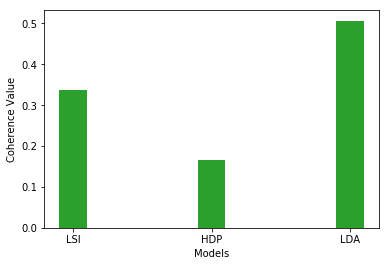

In [46]:
plt = utils.evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence], ['LSI', 'HDP', 'LDA'])
plt.show()

## LSI vs HDP vs LDA
As it is evident from the structure of outputs from LSI, LDA and HDP models, LDA captures the different models better as compared to the other two. In case of LSI, although a first few topics are relevant, they seemingly become more unrelated as we go down the list. With HDP, the output is just the same topic for all the 10 occurences. LDA on the other hand produces mmore coherrent topics. This is also supported by the coherence bar plot that puts LDA at the top. For this reason, predictions on the test set is produced by using the LDA model 

In [92]:
# Test on Unseen Data
corpus_te = utils.create_data(sorted(X_test), lemmat=True)      
test_texts = utils.process_texts(corpus_te, stops, bigram_test)
corpus_test = [dictionary.doc2bow(text) for text in test_texts]
outputs = ldamodel[corpus_test]

In [151]:
# Peek into Outputs
idx = 0
outputs[idx]

[(2, 0.14189858267178726),
 (3, 0.13215307025629125),
 (4, 0.19568276684415192),
 (5, 0.4986819948750785)]

In [191]:
# Print the most likely topic model
idxlist = [6, 1, 2, 4, 5]
for idx in idxlist:
    topic_te = sorted(ldamodel[corpus_test[idx]])[-1][0]
    print '\033[1m' + "\nText", '\033[0m'
    print(utils.printTSV(sorted(X_test)[idx]))
    print '\033[1m' + "Predicted Topic", '\033[0m'
    utils.prettyPrint(ldatopics[topic_te], False)
    print("\n")


Text 
Okay, thanks, how would I add Vista to it? I was told that I should use a recovery disc to run the fixmbr command...is that another option? Oh and I have a USB stick...could I possibly fix the mbr that way?you can install ubuntu on usb stick and recover windows mbr with windows cdget ubuntu iso and unetbootinunetbootin
Predicted Topic 
gnome click compiz screen window right desktop alt system settings 


Text 
sudu ifup eth0 is that renew IP?that brings up an interface, not necessarily renew the DHCP lease.well you have to do sudo ifdown eth0 first?even then, an ifup doesn't necessarily renew a DHCP lease.
Predicted Topic 
like windows use linux ubuntu know good would one way 


Text 
I might have done something catastrophic to my computer.  I hope someone can help. I get the strangest warning when I log in now. Every time.....what does it sayYou'll probably need to go to the terminal and edit the permissions using sudo/sudo what lyag said to do. that'll probably fix it.
Predict